# Human Activity Recognition (HAR) Clustering and Visualization

## 1. Introduction
In this notebook, we analyze the UCI Human Activity Recognition (HAR) dataset using Gaussian Mixture Models (GMM) for clustering and visualize the results in both 3D and 2D space.

## 2. Dataset Exploration
We begin by loading and exploring the UCI HAR dataset to understand its structure.


In [1]:
import numpy as np

# Load the UCI HAR dataset
dataset = np.load('./UCI_HAR.npz')
x_train = dataset['x_train']
y_train = dataset['y_train']

print(f'The training set contains {x_train.shape[0]} samples, each with {x_train.shape[1]} features.')
print(f'There are {len(np.unique(y_train))} classes.')


The training set contains 7352 samples, each with 561 features.
There are 6 classes.


# 3. Clustering with Gaussian Mixture Model (GMM)
Next, we apply the Gaussian Mixture Model with six components to cluster the data.

In [2]:
from sklearn.mixture import GaussianMixture

# Initialize GMM with 6 components
gmm = GaussianMixture(n_components=6)

# Fit the model to the data
gmm.fit(x_train)

# Get cluster labels for each sample
labels = gmm.predict(x_train)


# 4. Evaluate Cluster Purity and Silhouette Score
We assess the quality of the clustering using Cluster Purity and Silhouette Score.

In [4]:
from sklearn.metrics import confusion_matrix, silhouette_score

def calculate_purity(y_true, y_cluster):
    confusion = confusion_matrix(y_true, y_cluster)
    cluster_majority = np.array([np.argmax(c) for c in confusion])
    correct_predictions = np.sum(confusion[np.arange(len(confusion)), cluster_majority])
    total_predictions = np.sum(confusion)
    purity = correct_predictions / total_predictions
    return purity

# Calculate purity
cluster_purity = calculate_purity(y_train, labels)
print(f'Cluster Purity: {cluster_purity:.4f}')

# Evaluate Silhouette Score
silhouette_avg = silhouette_score(x_train, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


Cluster Purity: 0.7278
Silhouette Score: 0.1623


# 5. Dimensionality Reduction for Visualization
To facilitate visualization, we perform Principal Component Analysis (PCA) for 3D and 2D representation.

In [5]:
from sklearn.decomposition import PCA

# Perform PCA for 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x_train)


# 6. 3D Scatter Plot
We create a 3D scatter plot to visualize the clustering in three-dimensional space.

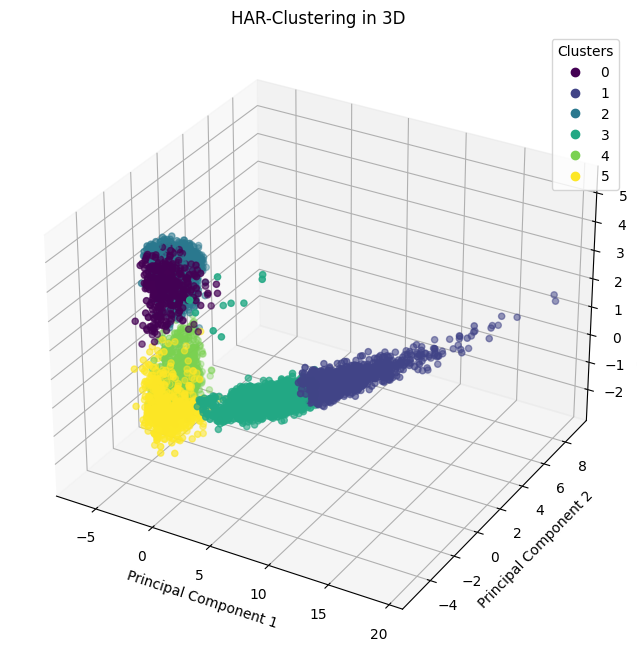

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_title('HAR-Clustering in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


# 7. 2D Scatter Plots
 Finally, we create three 2D scatter plots on different planes for a more detailed view of the clustering.

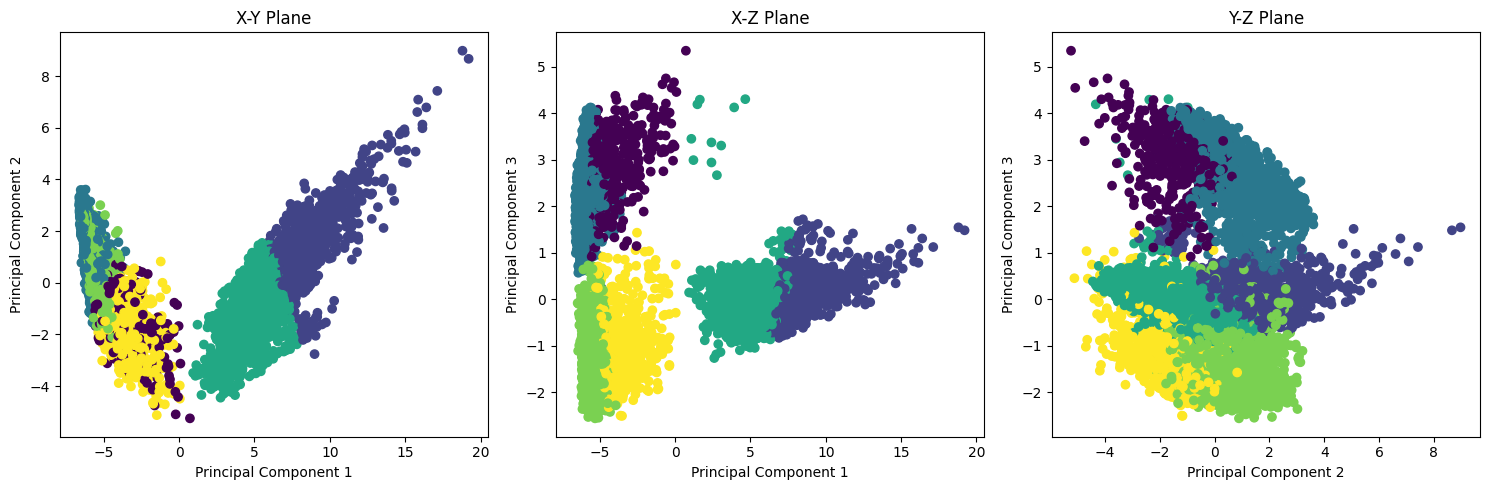

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# XY Plane
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
axes[0].set_title('X-Y Plane')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# XZ Plane
axes[1].scatter(X_pca[:, 0], X_pca[:, 2], c=labels, cmap='viridis')
axes[1].set_title('X-Z Plane')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 3')

# YZ Plane
axes[2].scatter(X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
axes[2].set_title('Y-Z Plane')
axes[2].set_xlabel('Principal Component 2')
axes[2].set_ylabel('Principal Component 3')

plt.tight_layout()
plt.show()